In [ ]:
# prompt: cargar csv que está en drive en la carpeta tesis

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# Assuming the file is named 'your_file.csv' and is directly inside the 'tesis' folder in your Google Drive
file_path = '/content/drive/My Drive/Tesis/Datos/personas.csv'

try:
  df = pd.read_csv(file_path, low_memory=False)
  print("CSV file loaded successfully!")
  print(df.head()) # Display the first 5 rows of the dataframe
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Mounted at /content/drive
CSV file loaded successfully!
   Unnamed: 0  ID_CENSO  DIRECCION_ID  DEPARTAMENTO  LOCALIDAD  VIVID  HOGID  \
0           1       1.0     1146859.0             1         20    1.0    1.0   
1           2       2.0     1146859.0             1         20    1.0    1.0   
2           3       3.0     1313925.0             1         20    1.0    1.0   
3           4       4.0     1313925.0             1         20    1.0    1.0   
4           5       5.0     1313925.0             1         20    1.0    1.0   

   PERID  REGION_4  AREA  ... AGREGADO_A_HOGAR_CENSADO MADRE_PERID  \
0    1.0         1     1  ...                        0         NaN   
1    2.0         1     1  ...                        0         NaN   
2    1.0         1     1  ...                        0         NaN   
3    2.0         1     1  ...                        0         NaN   
4    3.0         1     1  ...                        0         NaN   

   EXTRANJERO  TIPO_EXTRANJERO  ASISTENCIA

In [ ]:
# prompt: sacar estadísticas de df

print(df.describe())
print(df.info())

         Unnamed: 0      ID_CENSO  DIRECCION_ID  DEPARTAMENTO     LOCALIDAD  \
count  3.499451e+06  3.499451e+06  3.147614e+06  3.499451e+06  3.499451e+06   
mean   1.749726e+06  1.749726e+06  5.994712e+06  5.916170e+00  2.703490e+02   
std    1.010205e+06  1.010205e+06  5.614045e+06  5.724232e+00  4.834973e+02   
min    1.000000e+00  1.000000e+00  1.000001e+06  1.000000e+00  2.000000e+01   
25%    8.748635e+05  8.748635e+05  1.379029e+06  1.000000e+00  2.000000e+01   
50%    1.749726e+06  1.749726e+06  3.169012e+06  3.000000e+00  2.200000e+01   
75%    2.624588e+06  2.624588e+06  1.011668e+07  1.000000e+01  4.220000e+02   
max    3.499451e+06  3.499451e+06  1.902573e+07  1.900000e+01  9.898000e+03   

              VIVID         HOGID         PERID      REGION_4          AREA  \
count  3.147614e+06  3.147614e+06  3.151118e+06  3.499451e+06  3.499451e+06   
mean   1.000149e+00  1.008619e+00  7.666930e+00  1.658969e+01  1.515895e+01   
std    1.219270e-02  1.872948e-01  1.113096e+02  3.

In [ ]:
# prompt: agregar a Localidades una columna nueva que sea la combinación de departamento y localidad, en el caso que la localidad tenga solo 2 dígitos, agregar un 0 adelante y si el codigo de departamento es de un digito, también agregar un 0 adelante

# Function to pad department code with a leading zero if it's a single digit
def pad_department_code(code):
  code_str = str(int(code)) # Convert to int first to handle potential decimals, then to string
  if len(code_str) == 1:
    return '0' + code_str
  return code_str

# Function to pad locality code with a leading zero if it's two digits
def pad_locality_code(code):
  code_str = str(int(code)) # Convert to int first to handle potential decimals, then to string
  if len(code_str) == 2:
    return '0' + code_str
  return code_str

# Apply padding functions to 'codigo_departamento' and 'codigo_localidad'
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].apply(pad_department_code)
df['LOCALIDAD'] = df['LOCALIDAD'].apply(pad_locality_code)

# Combine the padded columns to create the new 'Localidades' column
df['LOCALIDAD_CODE'] = df['DEPARTAMENTO'].astype(str) + df['LOCALIDAD'].astype(str)

# Display the first few rows with the new column
print(df[['DEPARTAMENTO', 'LOCALIDAD', 'LOCALIDAD_CODE']].head())

  DEPARTAMENTO LOCALIDAD LOCALIDAD_CODE
0           01       020          01020
1           01       020          01020
2           01       020          01020
3           01       020          01020
4           01       020          01020


In [ ]:
Localidades = df.groupby(['LOCALIDAD_CODE','DEPARTAMENTO'], as_index=False).size().sort_values(by='size', ascending=False)

In [ ]:
Localidades

,LOCALIDAD_CODE,DEPARTAMENTO,size
0,01020,01,1287452
401,15120,15,114084
268,10020,10,102000
357,13020,13,84775
311,11120,11,81550
...,...,...,...
433,159898,15,32
249,089898,08,31
338,119898,11,29
478,179898,17,26


In [ ]:
'''# prompt: Filtrar el DF de localidades donde el size sea menor a 5000
umbral = 5000
Localidades_filtered = Localidades[Localidades['size'] < umbral]
print(Localidades_filtered.head())'''
Localidades_filtered = Localidades
Localidades

,LOCALIDAD_CODE,DEPARTAMENTO,size
0,01020,01,1287452
401,15120,15,114084
268,10020,10,102000
357,13020,13,84775
311,11120,11,81550
...,...,...,...
433,159898,15,32
249,089898,08,31
338,119898,11,29
478,179898,17,26


In [ ]:
# prompt: cargar el archivo Localidades_diccionario.xlsx y unirlo al df Localidades_filtered con el id de localidad

import pandas as pd
# Define the file path for the Excel file
excel_file_path = '/content/drive/My Drive/Tesis/Datos/Localidades_diccionario.xlsx'

try:
  # Load the Excel file
  df_localidades_diccionario = pd.read_excel(excel_file_path)
  print("\nExcel file 'Localidades_diccionario.xlsx' loaded successfully!")
  print(df_localidades_diccionario.head()) # Display the first 5 rows
except FileNotFoundError:
  print(f"Error: Excel file not found at {excel_file_path}")
except Exception as e:
  print(f"An error occurred while loading Excel file: {e}")



Excel file 'Localidades_diccionario.xlsx' loaded successfully!
   DPTOLOC_COD          LOC_NOMBRE
0         1020          MONTEVIDEO
1         1621             ABAYUBÁ
2         1622    SANTIAGO VÁZQUEZ
3         1721       PAJAS BLANCAS
4         1900  RURAL/PARAJE RURAL


In [ ]:
# Pad the 'DPTOLOC_COD' column with leading zeros to ensure it has 5 digits
df_localidades_diccionario['DPTOLOC_COD'] = df_localidades_diccionario['DPTOLOC_COD'].astype(str).str.zfill(5)

# Display the first few rows to verify the changes
print(df_localidades_diccionario.head())

  DPTOLOC_COD          LOC_NOMBRE
0       01020          MONTEVIDEO
1       01621             ABAYUBÁ
2       01622    SANTIAGO VÁZQUEZ
3       01721       PAJAS BLANCAS
4       01900  RURAL/PARAJE RURAL


In [ ]:
# prompt: unir  df_localidades_diccionario (con campo DPTOLOC_COD  ) y Localidades_filtered (con campo LOCALIDAD)

import pandas as pd


# Ensure the columns are of the same type before merging
df_localidades_diccionario['DPTOLOC_COD'] = df_localidades_diccionario['DPTOLOC_COD'].astype(str)
Localidades_filtered['LOCALIDAD_CODE'] = Localidades_filtered['LOCALIDAD_CODE'].astype(str)


merged_df = pd.merge(Localidades_filtered, df_localidades_diccionario, left_on='LOCALIDAD_CODE', right_on='DPTOLOC_COD', how='inner')

print("\nMerged DataFrame:")
print(merged_df.head())


Merged DataFrame:
  LOCALIDAD_CODE DEPARTAMENTO     size DPTOLOC_COD  LOC_NOMBRE
0          01020           01  1287452       01020  MONTEVIDEO
1          15120           15   114084       15120       SALTO
2          10020           10   102000       10020   MALDONADO
3          13020           13    84775       13020      RIVERA
4          11120           11    81550       11120    PAYSANDU


In [ ]:
# prompt: cargar archivo Departamentos_diccionario.xlsx y unirlo con merged_df
# pd.merge(merged_df , df_diccionario_diccionario, left_on='DEPARTAMENTO', right_on='DPTO_CODIGO', how='inner') y agregar solo DPTO_NOMBRE

import pandas as pd
excel_departamento_file_path = '/content/drive/My Drive/Tesis/Datos/Departamentos_diccionario.xlsx'

try:
  # Load the Excel file
  df_diccionario_diccionario = pd.read_excel(excel_departamento_file_path)
  # Pad the 'DPTO_CODIGO' column with leading zeros to ensure it has 2 digits
  df_diccionario_diccionario['DPTO_CODIGO'] = df_diccionario_diccionario['DPTO_CODIGO'].astype(str).str.zfill(2)

  # Display the first few rows to verify the changes
  print(df_diccionario_diccionario.head())
  print("\nExcel file 'Departamentos_diccionario.xlsx' loaded successfully!")
  print(df_diccionario_diccionario.head()) # Display the first 5 rows
except FileNotFoundError:
  print(f"Error: Excel file not found at {excel_departamento_file_path}")
except Exception as e:
  print(f"An error occurred while loading Excel file: {e}")

# Ensure the columns are of the same type before merging
df_diccionario_diccionario['DPTO_CODIGO'] = df_diccionario_diccionario['DPTO_CODIGO'].astype(str)
merged_df['DEPARTAMENTO'] = merged_df['DEPARTAMENTO'].astype(str)

merged_df = pd.merge(merged_df , df_diccionario_diccionario[['DPTO_CODIGO', 'DPTO_NOMBRE']], left_on='DEPARTAMENTO', right_on='DPTO_CODIGO', how='inner')

print("\nMerged DataFrame with Departamento Nombre:")
print(merged_df.head())

   DPTO_NOMBRE DPTO_CODIGO
0   Montevideo          01
1      Artigas          02
2    Canelones          03
3  Cerro Largo          04
4      Colonia          05

Excel file 'Departamentos_diccionario.xlsx' loaded successfully!
   DPTO_NOMBRE DPTO_CODIGO
0   Montevideo          01
1      Artigas          02
2    Canelones          03
3  Cerro Largo          04
4      Colonia          05

Merged DataFrame with Departamento Nombre:
  LOCALIDAD_CODE DEPARTAMENTO     size DPTOLOC_COD  LOC_NOMBRE DPTO_CODIGO  \
0          01020           01  1287452       01020  MONTEVIDEO          01   
1          15120           15   114084       15120       SALTO          15   
2          10020           10   102000       10020   MALDONADO          10   
3          13020           13    84775       13020      RIVERA          13   
4          11120           11    81550       11120    PAYSANDU          11   

  DPTO_NOMBRE  
0  Montevideo  
1       Salto  
2   Maldonado  
3      Rivera  
4    Paysandú  


In [ ]:
#!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
import time
import pandas as pd

In [ ]:
geolocator = Nominatim(user_agent="tesis-ana")

def geolocalizar_fila(fila):
    """Geocodifica una localidad uniendo localidad y departamento"""
    nombre_localidad = fila['LOC_NOMBRE']
    departamento = fila['DPTO_NOMBRE']
    try:
        location = geolocator.geocode(f"{nombre_localidad}, {departamento}, Uruguay")
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

In [ ]:
coordenadas = []
for i, fila in merged_df.iterrows():
    lat, lon = geolocalizar_fila(fila)
    coordenadas.append((lat, lon))
    time.sleep(1)  # Espera 1 segundo entre consultas

merged_df[['LAT', 'LON']] = pd.DataFrame(coordenadas, index=merged_df.index)

In [ ]:
# prompt: descargar merged_df a un csv, que lo voy a subir a drive y ya armar el código para leerlo desde ahí

import pandas as pd
# Save the merged_df to a CSV file in your Google Drive
output_csv_path = '/content/drive/My Drive/Tesis/Datos/merged_localidades.csv'

try:
  merged_df.to_csv(output_csv_path, index=False)
  print(f"\nMerged DataFrame saved successfully to {output_csv_path}")
except Exception as e:
  print(f"\nAn error occurred while saving the CSV file: {e}")
'''
# Code to read the saved CSV from Google Drive (for verification or further use)
try:
  read_merged_df = pd.read_csv(output_csv_path)
  print(f"\nSuccessfully read the saved CSV file from {output_csv_path}")
  print(read_merged_df.head())
except FileNotFoundError:
  print(f"Error: Saved CSV file not found at {output_csv_path}")
except Exception as e:
  print(f"An error occurred while reading the saved CSV file: {e}")'''


Merged DataFrame saved successfully to /content/drive/My Drive/Tesis/Datos/merged_localidades.csv


'\n# Code to read the saved CSV from Google Drive (for verification or further use)\ntry:\n  read_merged_df = pd.read_csv(output_csv_path)\n  print(f"\nSuccessfully read the saved CSV file from {output_csv_path}")\n  print(read_merged_df.head())\nexcept FileNotFoundError:\n  print(f"Error: Saved CSV file not found at {output_csv_path}")\nexcept Exception as e:\n  print(f"An error occurred while reading the saved CSV file: {e}")'

El dataset merged_df es resultados de cargarle la latitud y longitud a las localidades y departamentos de los resultados del censo del INE.

In [ ]:
merged_df

,LOCALIDAD_CODE,DEPARTAMENTO,size,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,LAT,LON
0,15120,15,114084,15120,SALTO,15,Salto,-31.388890,-57.960888
1,10020,10,102000,10020,MALDONADO,10,Maldonado,-34.908716,-54.958272
2,13020,13,84775,13020,RIVERA,13,Rivera,-30.900058,-55.540815
3,11120,11,81550,11120,PAYSANDU,11,Paysandú,-32.321726,-58.089214
4,18020,18,60586,18020,TACUAREMBO,18,Tacuarembó,-31.711018,-55.978876
...,...,...,...,...,...,...,...,...,...
232,18992,18,107,18992,PUNTA DE CARRETERA,18,Tacuarembó,-32.082900,-55.185648
233,15945,15,107,15945,LAURELES,15,Salto,-31.498759,-57.525990
234,12825,12,106,12825,SAUCE,12,Río Negro,-32.901836,-57.738188
235,10990,10,105,10990,PUEBLO MIO,10,Maldonado,-34.870124,-54.836876


In [ ]:
# prompt: filtrar merged_df donde LAT is NaN y LOC_NOMBRE no es RURAL/PARAJE RURAL

merged_df_to_geocode = merged_df[(merged_df['LAT'].isna()) & (merged_df['LOC_NOMBRE'].str.upper() != 'RURAL/PARAJE RURAL')]
print("\nFiltered DataFrame (LAT is NaN and LOC_NOMBRE is not RURAL/PARAJE RURAL):")
print(merged_df_to_geocode.head())
print(f"\nNumber of rows in the filtered DataFrame: {len(merged_df_to_geocode)}")


Filtered DataFrame (LAT is NaN and LOC_NOMBRE is not RURAL/PARAJE RURAL):
    LOCALIDAD_CODE DEPARTAMENTO  size DPTOLOC_COD  \
23           19956           19  7692       19956   
67           19722           19  1429       19722   
144          14960           14   379       14960   
181          14964           14   192       14964   
182          10962           10   190       10962   

                                 LOC_NOMBRE DPTO_CODIGO     DPTO_NOMBRE  LAT  \
23                  EJIDO DE TREINTA Y TRES          19  Treinta y Tres  NaN   
67                   GRAL. ENRIQUE MARTINEZ          19  Treinta y Tres  NaN   
144  PTA. RUBIA Y STA. ISABEL DE LA PEDRERA          14           Rocha  NaN   
181                              LA RIBIERA          14           Rocha  NaN   
182         RUTA 37 Y 9 - SIERRAS DEL TIROL          10       Maldonado  NaN   

     LON  
23   NaN  
67   NaN  
144  NaN  
181  NaN  
182  NaN  

Number of rows in the filtered DataFrame: 9


In [ ]:
#!pip install geopandas

import geopandas as gpd

# prompt: cargar csv que está en drive en la carpeta tesis

from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo shapefile
shp_path =  '/content/drive/My Drive/Tesis/Datos/v_camineria_nacional.shp'
roads = gpd.read_file(shp_path)

# Ver tipos y estructura
print(roads.columns)
print(roads.crs, roads.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['gid', 'codigo', 'numero', 'nombre', 'depto', 'jurisdicci', 'categoria',
       'sentido', 'carriles', 'calzada', 'fuente', 'observacio', 'nat_juridi',
       'geometry'],
      dtype='object')
EPSG:4326        gid     codigo  numero                        nombre depto  \
0  3344250  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
1   349731  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
2   292738  UY0270000    27.0                   Mario Heber  UYRV   
3   305834  UY0050000     5.0  Brig. Gral. Fructuoso Rivera  UYMO   
4  3343102   UYTA0284     NaN                          None  UYTA   

    jurisdicci                categoria  \
0     NACIONAL   CORREDOR INTERNACIONAL   
1     NACIONAL   CORREDOR INTERNACIONAL   
2     NACIONAL          RUTA SECUNDARIA   
3     NACIONAL   CORREDOR INTERNACIONAL   
4  SIN DEFINIR  CAMINERÍA DEPA

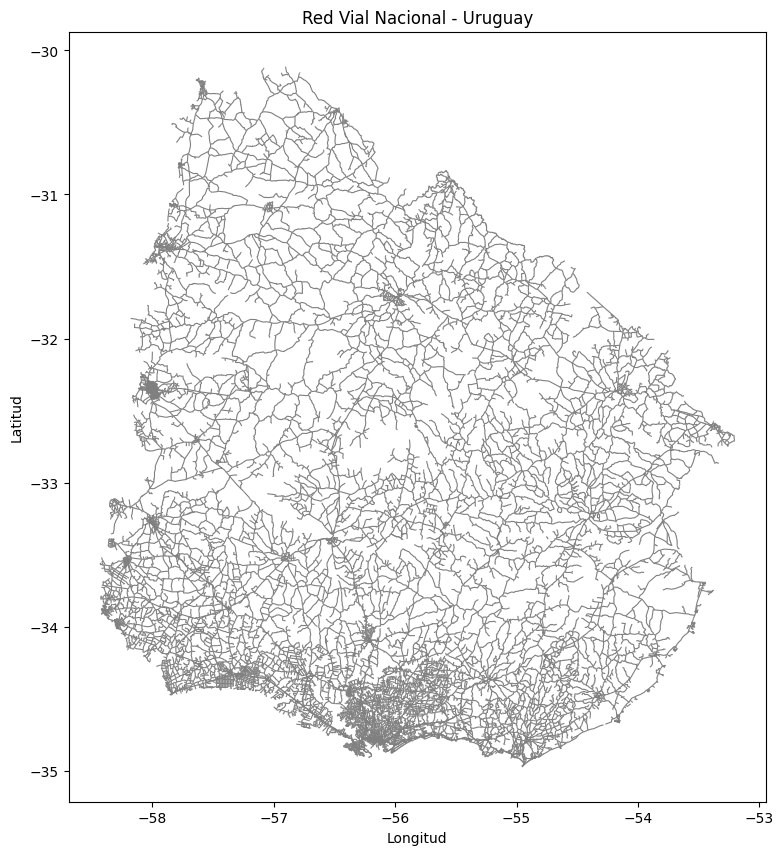

In [ ]:
import matplotlib.pyplot as plt

roads.plot(figsize=(10, 10), linewidth=0.8, edgecolor='gray')
plt.title("Red Vial Nacional - Uruguay")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [ ]:
# prompt: agregarle color verde a las rutas nacionales al gráfico

import matplotlib.pyplot as plt
# Select only 'NACIONAL' roads and plot them with green color
nacional_roads = roads[roads['TIPO'].str.upper() == 'NACIONAL']

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot all roads (optional, as a background)
roads.plot(ax=ax, linewidth=0.8, edgecolor='gray')

# Plot the 'NACIONAL' roads with green color
nacional_roads.plot(ax=ax, color='green', linewidth=1.5) # You can adjust linewidth and color

plt.title("Red Vial Nacional - Uruguay (Rutas Nacionales en Verde)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

KeyError: 'TIPO'

In [ ]:
roads.plot()

In [ ]:
rutas_nacionales = roads[roads['jurisdicci'] == 'NACIONAL'].copy()

rutas_nacionales.plot(figsize=(10, 10), edgecolor='green', linewidth=0.8)
plt.title("Rutas Nacionales Seleccionadas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


IDEA DE GRAFO:

podriamos hacer un grafo entre localidades donde dos localidades estén unidas si son las más cercanas y cada arista tenga weight o peso la distancia que hay que recorrer entre una y la otra.

Un arbol recurridor que minimice el peso del arbol ? Donde cada bifurcación es una parada distinta.


CÁLCULO DE DISTANCIAS:

Calcular distnacias de localdiades a rutas nacionales --> hacer grafos donde cada arista sea una ruta (un pedazo de ruta) y cada vértica sea una intersección de caminos